<a href="https://www.kaggle.com/code/ixpleew/students-health-analysis?scriptVersionId=297385023" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Students' health analysis

This Notebook is about to present students' health statistics and patterns that occur here.
First of all data, that I use, is imported from Kaggle and it's called "Student Health Data".

# Imports and dataset

Libraries that I've used are:
- pandas for managing data
- numpy for help with data
- maplotlib for creating plots for data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
health_data = pd.read_csv("/kaggle/input/datasets/mjawad17/student-health-data/student_health_data.csv")
health_data = health_data.drop(columns=["Unnamed: 15", "Unnamed: 16", "Unnamed: 17", "Unnamed: 18", "Unnamed: 19", "Unnamed: 20", "Unnamed: 21", "Unnamed: 22"])
health_data 

,Student_ID,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level,Family_members
0,1,24,M,50.663217,122.173015,84.419860,3.137350,9.028669,High,Moderate,Happy,34.520973,16.800956,Moderate,2
1,2,21,F,57.926042,110.778407,75.696145,3.699078,5.819697,Moderate,Good,Stressed,16.763846,15.791154,Moderate,1
2,3,22,M,59.294219,109.375673,83.803814,6.785156,5.892360,Low,Moderate,Happy,44.203798,25.678437,Moderate,12
3,4,24,M,76.826232,125.142227,78.091587,6.408509,6.884001,High,Poor,Happy,21.776645,20.808391,High,9
4,5,20,M,68.342769,107.515592,80.674937,7.264719,4.483450,Moderate,Poor,Happy,8.964999,15.194045,Moderate,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,23,F,68.185217,126.031324,69.156288,8.318278,6.841725,Moderate,Moderate,Stressed,30.554113,9.491591,Moderate,7
996,997,18,F,77.720216,100.627116,75.569051,6.295881,4.152130,High,Poor,Happy,29.285850,22.819961,High,6
997,998,24,M,85.313237,124.362792,91.817614,2.896868,9.253887,Moderate,Good,Happy,15.330941,19.010784,Moderate,14
998,999,21,M,79.212477,106.370246,77.218808,3.130484,2.205774,Low,Poor,Neutral,31.921143,9.159565,Low,12


# Age and its impact on basic health statistics

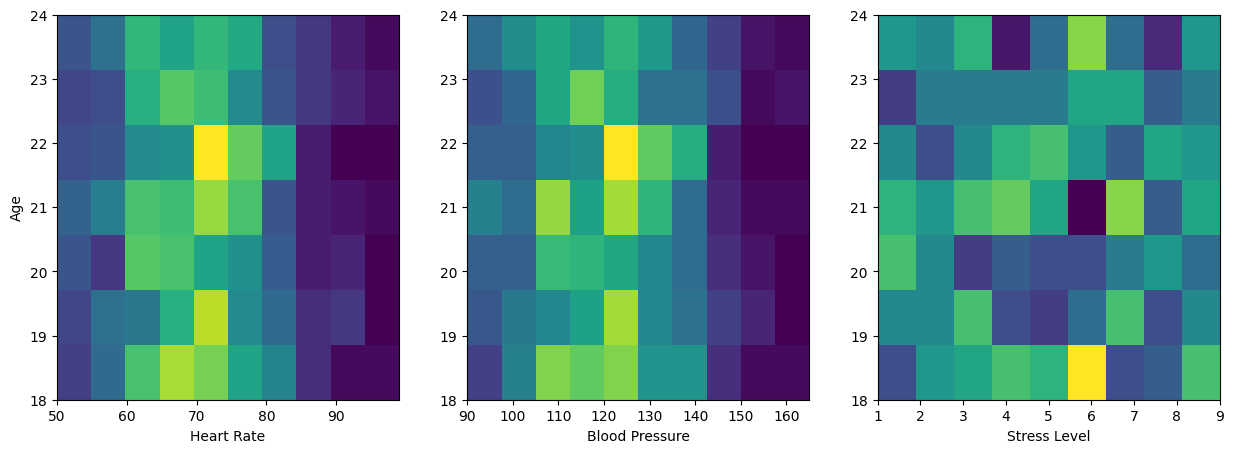

In [2]:
fig, (heart_rate, blood_pressure, stress_level) = plt.subplots(1,3, figsize=(15,5))

age_data = health_data.Age
# creating plots:
health_data = health_data.sort_values(by="Heart_Rate")
heart_rate.hist2d(health_data.Heart_Rate.astype(int), age_data, bins=[10, 7])
heart_rate.set_xlabel("Heart Rate")

health_data = health_data.sort_values(by="Blood_Pressure_Systolic")
blood_pressure.hist2d(health_data.Blood_Pressure_Systolic.astype(int), age_data, bins=[10, 7])
blood_pressure.set_xlabel("Blood Pressure")

healt_data = health_data.sort_values(by="Stress_Level_Biosensor")
stress_level.hist2d(health_data.Stress_Level_Biosensor.astype(int), age_data, bins=[9,7])
stress_level.set_xlabel("Stress Level")
heart_rate.set_ylabel("Age")

plt.show()


# 

As we see heart rates and blood pressures are quite the same among the students,
What is the most interesting fact about students is their stress level. 
This research shows us that it doesn't matter at which level of studying you are,
when it comes to stress level. So stress level is probably connected to other values.

# Do gender have something with lifestyle? 

Let's see which gender is more likely to have more active lifestyle

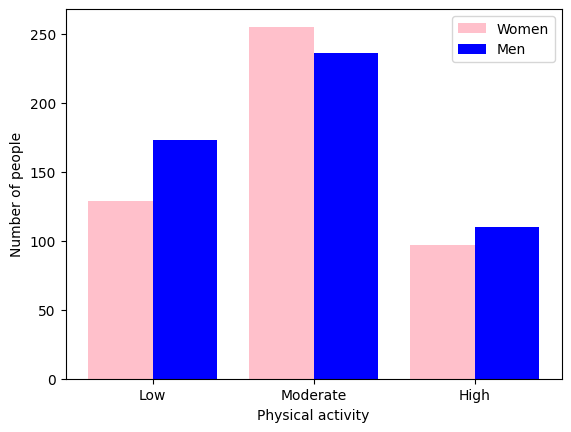

In [3]:
physical_variety = ["Low", "Moderate", "High"]
female_data = health_data.loc[(health_data.Gender == "F")]
male_data = health_data.loc[(health_data.Gender == "M")]

gender_quantity = {
    "Female":(
        (female_data.Physical_Activity == "Low").sum(),
        (female_data.Physical_Activity == "Moderate").sum(),
        (female_data.Physical_Activity == "High").sum()
    ),
    "Male":(
        (male_data.Physical_Activity == "Low").sum(),
        (male_data.Physical_Activity == "Moderate").sum(),
        (male_data.Physical_Activity == "High").sum()
    )
}

width, height = 0.4, np.arange(len(physical_variety))
plt.bar(height - width/2, gender_quantity["Female"], width=width, label="Women", color="pink")
plt.bar(height + width/2, gender_quantity["Male"], width=width, label="Men", color="blue")

plt.xticks(height, physical_variety)
plt.ylabel("Number of people")
plt.xlabel("Physical activity")
plt.legend()
plt.show()

As you can see men are more "diverse" Either they train a lot or with a low activity. On the other hand, women are more determinated to train in a moderate way.  

Now let's see if there is a correlation between hours spent on studying and a sleep quality. I'm going connect every type of sleep quality to the mean hours. 

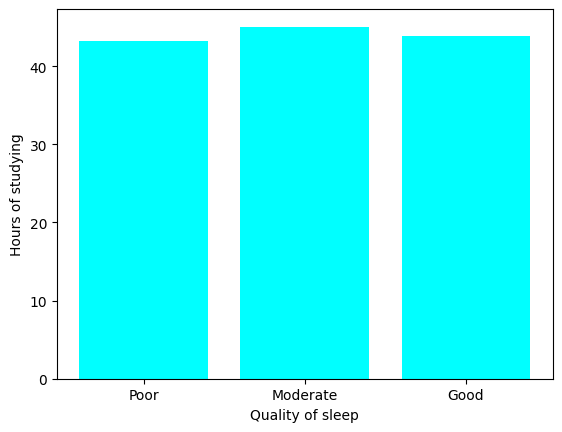

In [4]:
poor_data = health_data.loc[health_data.Sleep_Quality == "Poor"].copy()
poor_data["Total_Hours"] = poor_data["Study_Hours"].astype(int) + poor_data["Project_Hours"].astype(int)
poor_mean = poor_data["Total_Hours"].mean()

moderate_data = health_data.loc[health_data.Sleep_Quality == "Moderate"].copy()
moderate_data["Total_Hours"] = moderate_data["Study_Hours"].astype(int) + moderate_data["Project_Hours"].astype(int)
moderate_mean = moderate_data["Total_Hours"].mean()

good_data = health_data.loc[health_data.Sleep_Quality == "Good"].copy()
good_data["Total_Hours"] = good_data["Study_Hours"].astype(int) + good_data["Project_Hours"].astype(int)
good_mean = good_data["Total_Hours"].mean()


fig, ax = plt.subplots()
ax.bar(["Poor", "Moderate", "Good"], [poor_mean, moderate_mean, good_mean], color="aqua")
ax.set_ylabel("Hours of studying")
ax.set_xlabel("Quality of sleep")
plt.show()


These bars show us that number of hours spent on studying doesn't impact our sleep quality

Now, let's move on to the next important section - mood. Do sports and sleep have something with it?

# Sleep and sports, when it comes to mood

For happy people:

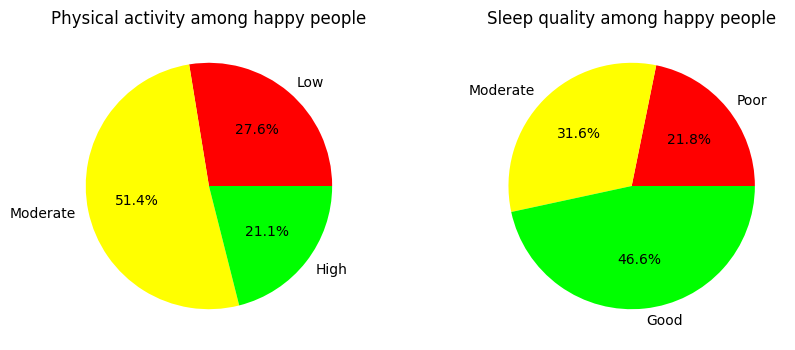

In [5]:
health_data
happy_mood_data = health_data.loc[health_data.Mood == "Happy"].copy()
fig, (ax_sport, ax_sleep) = plt.subplots(1, 2, figsize=[10, 4])

sport_sizes = [(happy_mood_data.Physical_Activity == "Low").sum(), (happy_mood_data.Physical_Activity == "Moderate").sum(), (happy_mood_data.Physical_Activity == "High").sum()]
ax_sport.pie(sport_sizes, labels=["Low", "Moderate", "High"], colors=["red", "yellow", "lime"], autopct="%1.1f%%")
ax_sport.set_title("Physical activity among happy people")

sleep_sizes = [(happy_mood_data.Sleep_Quality == "Poor").sum(), (happy_mood_data.Sleep_Quality == "Moderate").sum(), (happy_mood_data.Sleep_Quality == "Good").sum()]
ax_sleep.pie(sleep_sizes, labels=["Poor", "Moderate", "Good"], colors=["red", "yellow", "lime"], autopct="%1.1f%%")
ax_sleep.set_title("Sleep quality among happy people")


plt.show()

For neutral mood people:

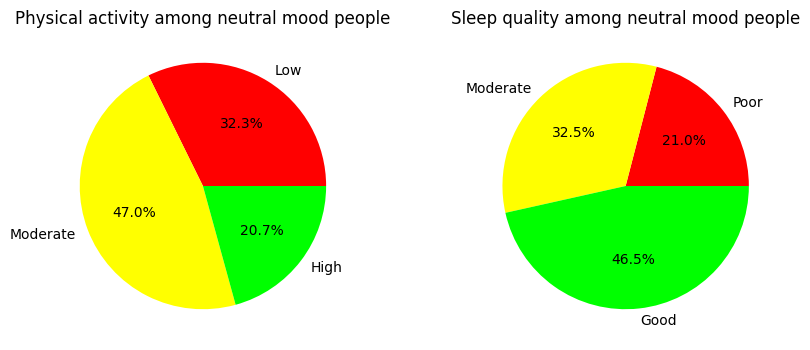

In [6]:
neutral_mood_data = health_data.loc[health_data.Mood == "Neutral"].copy()
fig, (ax_sport, ax_sleep) = plt.subplots(1,2, figsize=[10, 4])

sport_sizes = neutral_mood_data.groupby("Physical_Activity").size()
sport_sizes = sport_sizes.reindex(["Low", "Moderate", "High"], fill_value=0)
ax_sport.set_title("Physical activity among neutral mood people")

sleep_sizes = neutral_mood_data.groupby("Sleep_Quality").size()
sleep_sizes = sleep_sizes.reindex(["Poor", "Moderate", "Good"], fill_value=0)
ax_sleep.set_title("Sleep quality among neutral mood people")

ax_sport.pie(sport_sizes, labels=sport_sizes.index, colors=["red", "yellow", "lime"], autopct="%1.1f%%")
ax_sleep.pie(sleep_sizes, labels=sleep_sizes.index, colors=["red", "yellow", "lime"], autopct="%1.1f%%")

plt.show()


For stressed people 

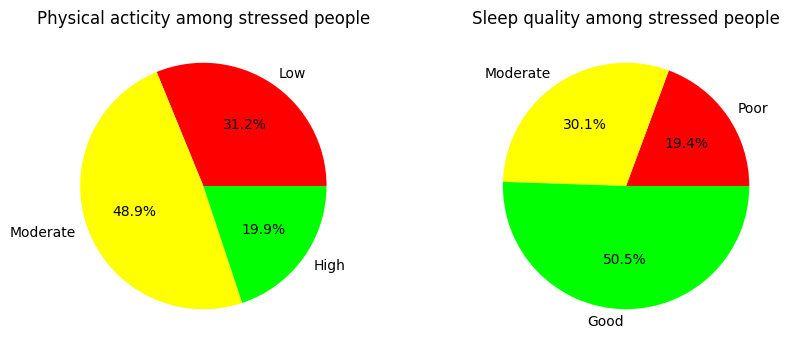

In [7]:
stressed_data = health_data.loc[health_data.Mood == "Stressed"].copy()

fig, (ax_sport, ax_sleep) = plt.subplots(1,2, figsize=[10, 4])

sport_sizes = stressed_data.groupby("Physical_Activity").size()
sport_sizes = sport_sizes.reindex(["Low", "Moderate", "High"], fill_value=0)
ax_sport.set_title("Physical acticity among stressed people")

sleep_sizes = stressed_data.groupby("Sleep_Quality").size()
sleep_sizes = sleep_sizes.reindex(["Poor", "Moderate", "Good"], fill_value=0)
ax_sleep.set_title("Sleep quality among stressed people")

ax_sport.pie(sport_sizes, labels=sport_sizes.index, colors=["red", "yellow", "lime"], autopct="%1.1f%%")
ax_sleep.pie(sleep_sizes, labels=sleep_sizes.index, colors=["red", "yellow", "lime"], autopct="%1.1f%%")

plt.show()